In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications import DenseNet121
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x = np.load('/content/drive/MyDrive/791_new/Noise Free/NF_Xfs.npy')
y = np.load('/content/drive/MyDrive/791_new/Noise Free/NF_Y.npy')

# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

# Create DenseNet base
input_shape = x_train.shape[1:]  # Assuming x_train is a numpy array of images
input_shape

(128, 128, 3)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(1680, 128, 128, 3)
(420, 128, 128, 3)


In [ ]:
from tensorflow.keras.applications import ConvNeXtTiny
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def create_ConvNeXtTiny_base(input_shape):
    # Load ConvNeXtTiny model without the top layer
    base_model = ConvNeXtTiny(include_top=False, input_shape=input_shape)

    # Perform global average pooling
    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # Add a dense layer with 125 sigmoid activated neurons
    x = Dense(125, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=x)
    return model

def create_classification_model(base_model, num_classes):
    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = True

    # Add a dense layer with softmax activation for classification
    x = Dense(num_classes, activation='softmax')(base_model.output)

    # Create the classification model
    model = Model(inputs=base_model.input, outputs=x)

    return model

base_model = create_ConvNeXtTiny_base(input_shape)

num_classes = 3  # Change this to the number of classes in your classification task
classification_model = create_classification_model(base_model, num_classes)

classification_model.summary()


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_prestem_no… │ (None, 128, 128, 3)    │              0 │ input_layer_10[0][0]   │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stem        │ (None, 32, 32, 96)     │          4,896 │ convnext_tiny_prestem… │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, 32, 32, 96)     │          4,800 │ convnext_tiny_stem[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, 32, 32, 96)     │            192 │ convnext_tiny_stage_0… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, 32, 32, 384)    │         37,248 │ convnext_tiny_stage_0… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, 32, 32, 384)    │              0 │ convnext_tiny_stage_0… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, 32, 32, 96)     │         36,960 │ convnext_tiny_stage_0… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, 32, 32, 96)     │             96 │ convnext_tiny_stage_0… │
│ (LayerScale)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, 32, 32, 96)     │              0 │ convnext_tiny_stage_0… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_36 (Add)              │ (None, 32, 32, 96)     │              0 │ convnext_tiny_stem[0]… │
│                           │                        │                │ convnext_tiny_stage_0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, 32, 32, 96)     │          4,800 │ add_36[0][0]           │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_tiny_stage_0_bl… │ (None, 32, 32, 96)     │            192 │ convnext_tiny_stage_0… │
│ (LayerNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 27,916,631 (106.49 MB)

 Trainable params: 27,916,631 (106.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
classification_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint("/content/drive/MyDrive/convnext.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=7, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

# Train the model
history = classification_model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_test, y_test), callbacks=[checkpoint, early_stopping, reduce_lr])

Epoch 1/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - accuracy: 0.3234 - loss: 1.1684
Epoch 1: val_loss improved from inf to 1.09579, saving model to /content/drive/MyDrive/convnext.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 85s 721ms/step - accuracy: 0.3234 - loss: 1.1677 - val_accuracy: 0.3667 - val_loss: 1.0958 - learning_rate: 0.0010
Epoch 2/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.3357 - loss: 1.1150
Epoch 2: val_loss did not improve from 1.09579
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - accuracy: 0.3355 - loss: 1.1150 - val_accuracy: 0.3048 - val_loss: 1.1288 - learning_rate: 0.0010
Epoch 3/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.3462 - loss: 1.1139
Epoch 3: val_loss did not improve from 1.09579
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.3460 - loss: 1.1138 - val_accuracy: 0.3048 - val_loss: 1.0995 - learning_rate: 0.0010
Epoch 4/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.3281 - loss: 1.1044
Epoch 4: val_loss did not improve f

In [ ]:
classification_model.load_weights("/content/drive/MyDrive/convnext.keras")
classification_model.evaluate(x_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.3758 - loss: 1.0952


[1.0957926511764526, 0.36666667461395264]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming classification_model.predict returns probabilities or predicted classes
y_pred = classification_model.predict(x_test)

# If y_pred contains probabilities, you may want to convert them to classes
# For binary classification:
# y_pred_classes = (y_pred > 0.5).astype(int)

# For multi-class classification with softmax output:
y_pred_classes = np.argmax(y_pred, axis=1)
from sklearn.metrics import classification_report

# Assuming y_pred_classes are predicted classes

# Generate classification report
report = classification_report(y_test, y_pred_classes, digits=5)

# Print the report
print("Classification Report:")
print(report)


14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       128
           1    0.00000   0.00000   0.00000       138
           2    0.36667   1.00000   0.53659       154

    accuracy                        0.36667       420
   macro avg    0.12222   0.33333   0.17886       420
weighted avg    0.13444   0.36667   0.19675       420



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step


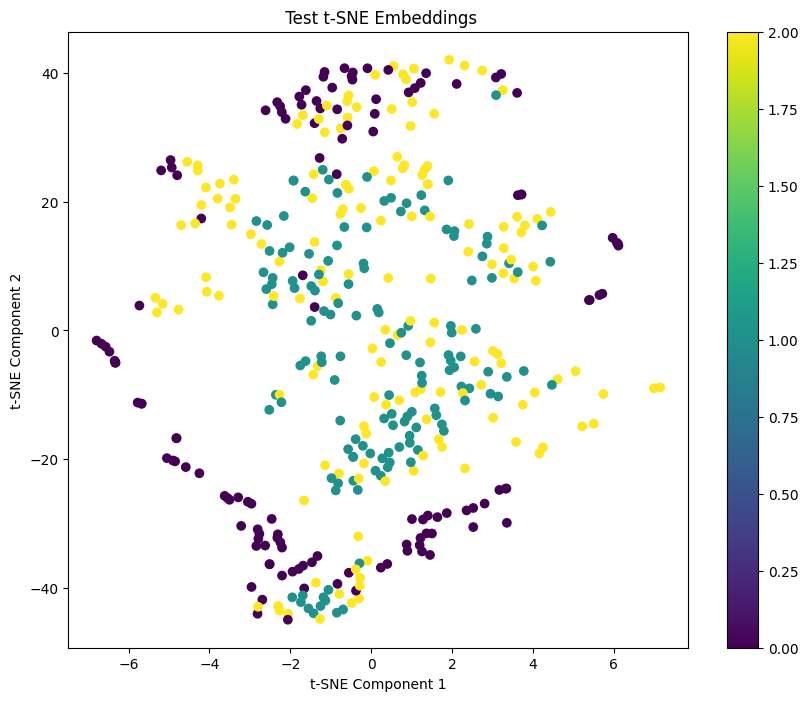

In [ ]:
# Visualize t-SNE embeddings
# Assuming x_train_embed and x_test_embed are the embeddings obtained from the penultimate layer
tsne = TSNE(n_components=2, random_state=42)
x_embed = base_model.predict(x_test)  # Assuming x_test is your test data
x_tsne = tsne.fit_transform(x_embed)

# Plot t-SNE embeddings
plt.figure(figsize=(10, 8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_test, cmap='viridis')
plt.colorbar()
plt.title(' Test t-SNE Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


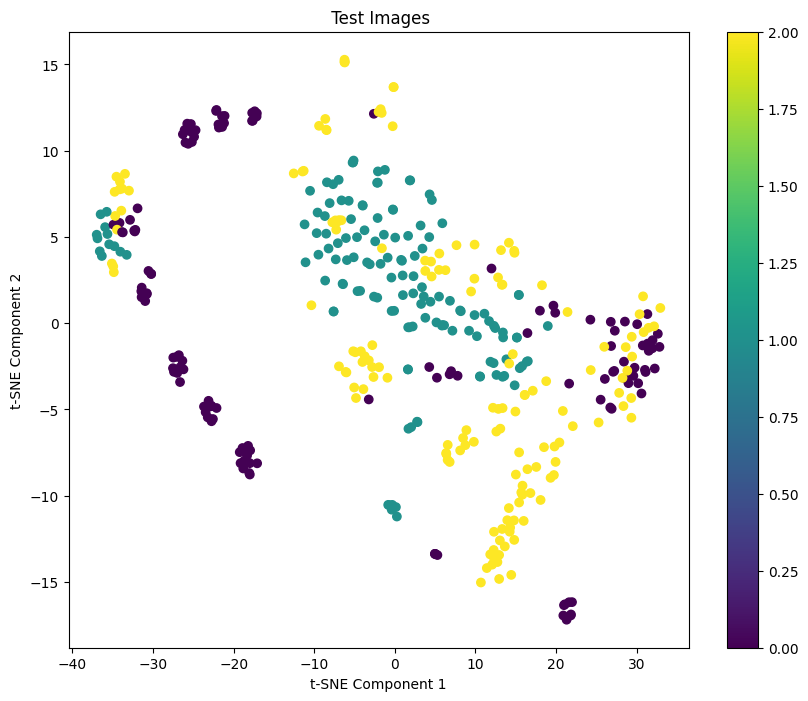

In [ ]:
# Visualize t-SNE embeddings
# Assuming x_train_embed and x_test_embed are the embeddings obtained from the penultimate layer
x_test_flat = x_test.reshape((420, 128*128*3))
tsne = TSNE(n_components=2, random_state=42)
#x_embed = base_model.predict(x_test)  # Assuming x_test is your test data
x_tsne = tsne.fit_transform(x_test_flat)

# Plot t-SNE embeddings
plt.figure(figsize=(10, 8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_test, cmap='viridis')
plt.colorbar()
plt.title(' Test Images')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


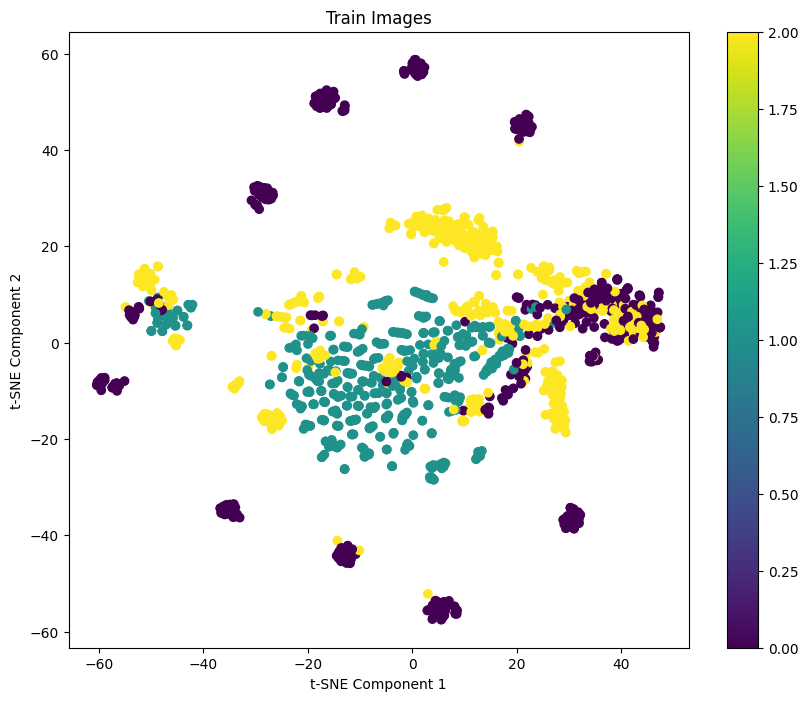

In [ ]:
# Visualize t-SNE embeddings
# Assuming x_train_embed and x_train_embed are the embeddings obtained from the penultimate layer
x_train_flat = x_train.reshape((1680, 128*128*3))
tsne = TSNE(n_components=2, random_state=42)
#x_embed = base_model.predict(x_train)  # Assuming x_train is your train data
x_tsne = tsne.fit_transform(x_train_flat)

# Plot t-SNE embeddings
plt.figure(figsize=(10, 8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_train, cmap='viridis')
plt.colorbar()
plt.title('Train Images')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step


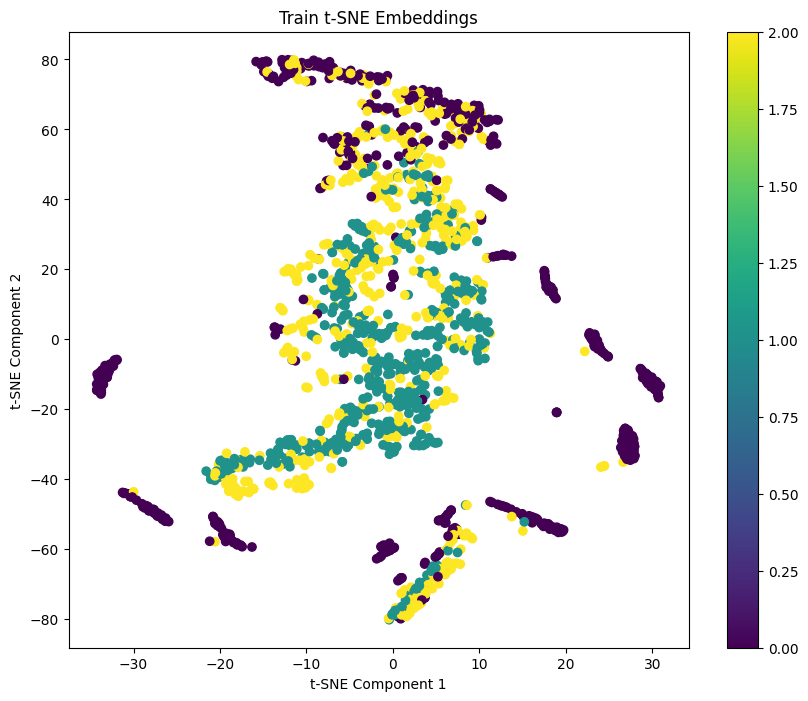

In [ ]:
# Visualize t-SNE embeddings
# Assuming x_train_embed and x_train_embed are the embeddings obtained from the penultimate layer
tsne = TSNE(n_components=2, random_state=42)
x_embed = base_model.predict(x_train)  # Assuming x_train is your train data
x_tsne = tsne.fit_transform(x_embed)

# Plot t-SNE embeddings
plt.figure(figsize=(10, 8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_train, cmap='viridis')
plt.colorbar()
plt.title('Train t-SNE Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


<h1>E-Mixup

In [ ]:
xtest_emb = base_model.predict(x_test)
xtrain_emb = base_model.predict(x_train)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


In [ ]:
import keras
y_test_o = keras.utils.to_categorical(y_test)
y_train_o = keras.utils.to_categorical(y_train)
print(y_train_o.shape)
print(y_test_o.shape)

(1680, 3)
(420, 3)


In [ ]:
def mixup(xt, yt, mf):
  alp = 0.2
  xaug = []
  yaug = []
  for k in range(0,xt.shape[0]):
    cnt = 0
    for cnt in range(0,mf-1):
      lbd = np.random.beta(alp,alp)
      yks = np.random.randint(xt.shape[0])
      kdash = xt[yks]
      ydash = yt[yks]
      kdash1 = xt[k]
      ydash1 = yt[k]
      xaug1 = kdash1*lbd + kdash*(1-lbd)
      yaug1 = ydash1*lbd + ydash*(1-lbd)
      xaug.append(xaug1)
      yaug.append(yaug1)
  xs2 = np.asarray(xaug)
  ys2 = np.asarray(yaug)
  x1 = np.concatenate((xt,xs2))
  y1 = np.concatenate((yt,ys2))
  return x1,y1

In [ ]:
xtrain_emb.shape

(1680, 125)

In [ ]:
xtt, ytt = mixup(xtrain_emb,y_train_o,3)
xtt.shape

(5040, 125)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import tensorflow as tf

Classifier_model = Sequential()
#add model layers
Classifier_model.Input = (125,)

Classifier_model.add(Dense(512,activation='relu'))
Classifier_model.add(Dense(512,activation='relu'))

Classifier_model.add(Dense(3, activation='softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
Classifier_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
Classifier_model.fit(xtt, ytt,epochs=25, validation_data=(xtest_emb, y_test_o))

Epoch 1/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3255 - loss: 1.1187 - val_accuracy: 0.3667 - val_loss: 1.0960
Epoch 2/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3364 - loss: 1.0993 - val_accuracy: 0.3286 - val_loss: 1.1033
Epoch 3/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3531 - loss: 1.0988 - val_accuracy: 0.3048 - val_loss: 1.1007
Epoch 4/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3349 - loss: 1.0988 - val_accuracy: 0.3286 - val_loss: 1.1001
Epoch 5/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3387 - loss: 1.0988 - val_accuracy: 0.3286 - val_loss: 1.0994
Epoch 6/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3351 - loss: 1.0987 - val_accuracy: 0.3286 - val_loss: 1.0999
Epoch 7/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3478 - loss: 1.0982 - val_accuracy: 0.3286 - val_loss: 1.0996
Epoch 8/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3320 - loss: 1.0988 - val_accuracy: 0

In [ ]:
Classifier_model.evaluate(xtest_emb, y_test_o)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3183 - loss: 1.0998 


[1.0994782447814941, 0.3285714387893677]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming Classifier_model.predict returns probabilities or predicted classes
y_pred = Classifier_model.predict(xtest_emb)

# If y_pred contains probabilities, you may want to convert them to classes
# For binary classification:
# y_pred_classes = (y_pred > 0.5).astype(int)
# For multi-class classification with softmax output:
y_pred_classes = np.argmax(y_pred, axis=1)
from sklearn.metrics import classification_report

# Assuming y_pred_classes are predicted classes

# Generate classification report
report = classification_report(y_test, y_pred_classes, digits=5)

# Print the report
print("Classification Report:")
print(report)



14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       128
           1    0.32857   1.00000   0.49462       138
           2    0.00000   0.00000   0.00000       154

    accuracy                        0.32857       420
   macro avg    0.10952   0.33333   0.16487       420
weighted avg    0.10796   0.32857   0.16252       420



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


E-Stitchup

In [ ]:
import numpy as np

def stichup(xt, yt, mf):
    alp = 0.2
    xaug = []
    yaug = []
    for k in range(xt.shape[0]):
        for _ in range(mf-1):  # Renamed loop counter to avoid confusion with loop index
            lbd = np.random.beta(alp, alp)
            yks = np.random.randint(xt.shape[0])
            kdash = xt[yks]  # Accessing rows of xt directly
            ydash = yt[yks]  # Accessing corresponding y value
            kdash1 = xt[k]    # Accessing rows of xt directly
            ydash1 = yt[k]    # Accessing corresponding y value
            lbd_stch = int(xt.shape[1] * lbd)
            reff_stich = np.zeros(xt.shape[1])
            for i in range(lbd_stch):
                index_stich = np.random.randint(xt.shape[1])
                reff_stich[index_stich] = 1
            xaug1 = np.zeros(xt.shape[1])  # Initialize as numpy array
            for i in range(len(reff_stich)):
                if reff_stich[i] == 0:
                    xaug1[i] = kdash[i]
                else:
                    xaug1[i] = kdash1[i]
            yaug1 = ydash1 * lbd + ydash * (1 - lbd)
            xaug.append(xaug1)
            yaug.append(yaug1)
    xs2 = np.asarray(xaug)
    ys2 = np.asarray(yaug)
    x1 = np.concatenate((xt, xs2))
    y1 = np.concatenate((yt, ys2))
    return x1, y1


In [ ]:
xtt, ytt = stichup(xtrain_emb,y_train_o,3)
xtt.shape

(5040, 125)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import tensorflow as tf

Classifier_model = Sequential()
#add model layers
Classifier_model.Input = (125,)

Classifier_model.add(Dense(512,activation='relu'))
Classifier_model.add(Dense(512,activation='relu'))

Classifier_model.add(Dense(3, activation='softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
Classifier_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
Classifier_model.fit(xtt, ytt,epochs=25, validation_data=(xtest_emb, y_test_o))

Epoch 1/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3412 - loss: 1.1244 - val_accuracy: 0.3286 - val_loss: 1.0987
Epoch 2/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3426 - loss: 1.0987 - val_accuracy: 0.3048 - val_loss: 1.0999
Epoch 3/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3337 - loss: 1.0989 - val_accuracy: 0.3048 - val_loss: 1.1011
Epoch 4/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3418 - loss: 1.0984 - val_accuracy: 0.3048 - val_loss: 1.1011
Epoch 5/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3440 - loss: 1.0985 - val_accuracy: 0.3048 - val_loss: 1.1011
Epoch 6/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3457 - loss: 1.0982 - val_accuracy: 0.3048 - val_loss: 1.1010
Epoch 7/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3397 - loss: 1.0981 - val_accuracy: 0.3048 - val_loss: 1.1007
Epoch 8/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3452 - loss: 1.0980 - val_accuracy: 0

In [ ]:
Classifier_model.evaluate(xtest_emb, y_test_o)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3058 - loss: 1.1010 


[1.100684642791748, 0.3047619163990021]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming Classifier_model.predict returns probabilities or predicted classes
y_pred = Classifier_model.predict(xtest_emb)

# If y_pred contains probabilities, you may want to convert them to classes
# For binary classification:
# y_pred_classes = (y_pred > 0.5).astype(int)
# For multi-class classification with softmax output:
y_pred_classes = np.argmax(y_pred, axis=1)
from sklearn.metrics import classification_report

# Assuming y_pred_classes are predicted classes

# Generate classification report
report = classification_report(y_test, y_pred_classes, digits=5)

# Print the report
print("Classification Report:")
print(report)



14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification Report:
              precision    recall  f1-score   support

           0    0.30476   1.00000   0.46715       128
           1    0.00000   0.00000   0.00000       138
           2    0.00000   0.00000   0.00000       154

    accuracy                        0.30476       420
   macro avg    0.10159   0.33333   0.15572       420
weighted avg    0.09288   0.30476   0.14237       420



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
